In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÏÉÅÍµ¨"
region_code = "11"
target_date = "2017-01-05"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÏÉÅÍµ¨2017_1q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2017-01-05   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425    ÏÇ¨ÏÉÅÍµ¨   7425    ÏÇ¨ÏÉÅÍµ¨   
1   2017-01-05     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5770    ÏÇ¨ÏÉÅÍµ¨   5823    ÏÇ¨ÏÉÅÍµ¨   
2   2017-01-05    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3560    ÏÇ¨ÏÉÅÍµ¨   3676    ÏÇ¨ÏÉÅÍµ¨   
3   2017-01-05     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3290    ÏÇ¨ÏÉÅÍµ¨   3480    ÏÇ¨ÏÉÅÍµ¨   
4   2017-01-05    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   7600    ÏÇ¨ÏÉÅÍµ¨   7990    ÏÇ¨ÏÉÅÍµ¨   
5   2017-01-05     ÎåÄÌåå                      1.0„éè   4281    ÏÇ¨ÏÉÅÍµ¨   5209    ÏÇ¨ÏÉÅÍµ¨   
6   2017-01-05   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   8950    ÏÇ¨ÏÉÅÍµ¨   9000    ÏÇ¨ÏÉÅÍµ¨   
7   2017-01-05     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4089    ÏÇ¨ÏÉÅÍµ¨   4089    ÏÇ¨ÏÉÅÍµ¨   
8   2017-01-05     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÏÇ¨ÏÉÅÍµ¨    676    ÏÇ¨ÏÉÅÍµ¨   
9   2017-01-05     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1320    ÏÇ¨ÏÉÅÍµ¨   1330    ÏÇ¨ÏÉÅÍµ¨   
10  2017-01-05      Î¨¥                   2.0„éè 1Í∞ú   3666    ÏÇ¨ÏÉÅÍµ¨   3898    ÏÇ¨ÏÉÅÍµ¨   
11  2017-01-05    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   2980    ÏÇ¨ÏÉÅÍµ¨   3290    ÏÇ¨ÏÉÅÍµ¨   
12  2017-01-05     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   2660    ÏÇ¨ÏÉÅÍµ¨   3300    ÏÇ¨ÏÉÅÍµ¨   
13  2017-01-05      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  18032    ÏÇ¨ÏÉÅÍµ¨  30827    ÏÇ¨ÏÉÅÍµ¨   
14  2017-01-05     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2096    ÏÇ¨ÏÉÅÍµ¨   2980    ÏÇ¨ÏÉÅÍµ¨   
15  2017-01-05  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6774    ÏÇ¨ÏÉÅÍµ¨   6890    ÏÇ¨ÏÉÅÍµ¨   
16  2017-01-05   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14800    ÏÇ¨ÏÉÅÍµ¨  14800    ÏÇ¨ÏÉÅÍµ¨   
17  2017-01-05     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  13243    ÏÇ¨ÏÉÅÍµ¨  13790    ÏÇ¨ÏÉÅÍµ¨   
18  2017-01-05    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316    ÏÇ¨ÏÉÅÍµ¨   2450    ÏÇ¨ÏÉÅÍµ¨   
19  2017-01-05     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1630    ÏÇ¨ÏÉÅÍµ¨   1630    ÏÇ¨ÏÉÅÍµ¨   
20  2017-01-05     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1130    ÏÇ¨ÏÉÅÍµ¨   1130    ÏÇ¨ÏÉÅÍµ¨   
21  2017-01-05    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5950    ÏÇ¨ÏÉÅÍµ¨   7140    ÏÇ¨ÏÉÅÍµ¨   
22  2017-01-05      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  32900    ÏÇ¨ÏÉÅÍµ¨  35800    ÏÇ¨ÏÉÅÍµ¨   
23  2017-01-05     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1663    ÏÇ¨ÏÉÅÍµ¨   1920    ÏÇ¨ÏÉÅÍµ¨   
24  2017-01-05     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÏÇ¨ÏÉÅÍµ¨    730    ÏÇ¨ÏÉÅÍµ¨   
25  2017-01-05    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7200    ÏÇ¨ÏÉÅÍµ¨   7250    ÏÇ¨ÏÉÅÍµ¨   
26  2017-01-05   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2580    ÏÇ¨ÏÉÅÍµ¨   2980    ÏÇ¨ÏÉÅÍµ¨   
27  2017-01-05     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2980    ÏÇ¨ÏÉÅÍµ¨   2990    ÏÇ¨ÏÉÅÍµ¨   
28  2017-01-05    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  13066    ÏÇ¨ÏÉÅÍµ¨  18562    ÏÇ¨ÏÉÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0       0    0.0%   7,425  
1      53   0.92%   5,797  
2     116   3.26%   3,618  
3     190   5.78%   3,385  
4     390   5.13%   7,795  
5     928  21.68%   4,745  
6      50   0.56%   8,975  
7       0    0.0%   4,089  
8       0    0.0%     676  
9      10   0.76%   1,325  
10    232   6.33%   3,782  
11    310   10.4%   3,135  
12    640  24.06%   2,980  
13  12795  70.96%  24,430  
14    884  42.18%   2,538  
15    116   1.71%   6,832  
16      0    0.0%  14,800  
17    547   4.13%  13,517  
18    134   5.79%   2,383  
19      0    0.0%   1,630  
20      0    0.0%   1,130  
21   1190   20.0%   6,545  
22   2900   8.81%  34,350  
23    257  15.45%   1,792  
24      0    0.0%     730  
25     50   

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÏÉÅÍµ¨"
region_code = "11"
target_date = "2017-04-13"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÏÉÅÍµ¨2017_2q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2017-04-13   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425    ÏÇ¨ÏÉÅÍµ¨  14850    ÏÇ¨ÏÉÅÍµ¨   
1   2017-04-13     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5770    ÏÇ¨ÏÉÅÍµ¨   5818    ÏÇ¨ÏÉÅÍµ¨   
2   2017-04-13     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2980    ÏÇ¨ÏÉÅÍµ¨   2990    ÏÇ¨ÏÉÅÍµ¨   
3   2017-04-13    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   8552    ÏÇ¨ÏÉÅÍµ¨   9514    ÏÇ¨ÏÉÅÍµ¨   
4   2017-04-13     ÎåÄÌåå                      1.0„éè   4983    ÏÇ¨ÏÉÅÍµ¨   6670    ÏÇ¨ÏÉÅÍµ¨   
5   2017-04-13   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   8950    ÏÇ¨ÏÉÅÍµ¨   9950    ÏÇ¨ÏÉÅÍµ¨   
6   2017-04-13     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4089    ÏÇ¨ÏÉÅÍµ¨   4089    ÏÇ¨ÏÉÅÍµ¨   
7   2017-04-13     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÏÇ¨ÏÉÅÍµ¨    676    ÏÇ¨ÏÉÅÍµ¨   
8   2017-04-13     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1320    ÏÇ¨ÏÉÅÍµ¨   1330    ÏÇ¨ÏÉÅÍµ¨   
9   2017-04-13      Î¨¥                   2.0„éè 1Í∞ú   1904    ÏÇ¨ÏÉÅÍµ¨   2057    ÏÇ¨ÏÉÅÍµ¨   
10  2017-04-13    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   2460    ÏÇ¨ÏÉÅÍµ¨   3290    ÏÇ¨ÏÉÅÍµ¨   
11  2017-04-13      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  22023    ÏÇ¨ÏÉÅÍµ¨  32330    ÏÇ¨ÏÉÅÍµ¨   
12  2017-04-13     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2334    ÏÇ¨ÏÉÅÍµ¨   3080    ÏÇ¨ÏÉÅÍµ¨   
13  2017-04-13  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6490    ÏÇ¨ÏÉÅÍµ¨   6521    ÏÇ¨ÏÉÅÍµ¨   
14  2017-04-13   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14800    ÏÇ¨ÏÉÅÍµ¨  14800    ÏÇ¨ÏÉÅÍµ¨   
15  2017-04-13     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  13228    ÏÇ¨ÏÉÅÍµ¨  16510    ÏÇ¨ÏÉÅÍµ¨   
16  2017-04-13    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2208    ÏÇ¨ÏÉÅÍµ¨   2450    ÏÇ¨ÏÉÅÍµ¨   
17  2017-04-13     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÏÇ¨ÏÉÅÍµ¨   1580    ÏÇ¨ÏÉÅÍµ¨   
18  2017-04-13     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÏÇ¨ÏÉÅÍµ¨   1190    ÏÇ¨ÏÉÅÍµ¨   
19  2017-04-13    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  40000    ÏÇ¨ÏÉÅÍµ¨  42450    ÏÇ¨ÏÉÅÍµ¨   
20  2017-04-13    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4420    ÏÇ¨ÏÉÅÍµ¨   7800    ÏÇ¨ÏÉÅÍµ¨   
21  2017-04-13      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  29900    ÏÇ¨ÏÉÅÍµ¨  35800    ÏÇ¨ÏÉÅÍµ¨   
22  2017-04-13     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2383    ÏÇ¨ÏÉÅÍµ¨   2770    ÏÇ¨ÏÉÅÍµ¨   
23  2017-04-13     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÏÇ¨ÏÉÅÍµ¨    730    ÏÇ¨ÏÉÅÍµ¨   
24  2017-04-13    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   4980    ÏÇ¨ÏÉÅÍµ¨   5490    ÏÇ¨ÏÉÅÍµ¨   
25  2017-04-13   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2680    ÏÇ¨ÏÉÅÍµ¨   2990    ÏÇ¨ÏÉÅÍµ¨   
26  2017-04-13     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   1980    ÏÇ¨ÏÉÅÍµ¨   2999    ÏÇ¨ÏÉÅÍµ¨   
27  2017-04-13    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  11793    ÏÇ¨ÏÉÅÍµ¨  18562    ÏÇ¨ÏÉÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    7425  100.0%  11,138  
1      48   0.83%   5,794  
2      10   0.34%   2,985  
3     962  11.25%   9,033  
4    1687  33.86%   5,827  
5    1000  11.17%   9,450  
6       0    0.0%   4,089  
7       0    0.0%     676  
8      10   0.76%   1,325  
9     153   8.04%   1,981  
10    830  33.74%   2,875  
11  10307   46.8%  27,177  
12    746  31.96%   2,707  
13     31   0.48%   6,506  
14      0    0.0%  14,800  
15   3282  24.81%  14,869  
16    242  10.96%   2,329  
17      0    0.0%   1,580  
18      0    0.0%   1,190  
19   2450   6.12%  41,225  
20   3380  76.47%   6,110  
21   5900  19.73%  32,850  
22    387  16.24%   2,577  
23      0    0.0%     730  
24    510  10.24%   5,235  
25    310  11.57%   2,835  
26   1019  51.46%   2,490  
27   6769   57.4%  15,178

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÏÉÅÍµ¨"
region_code = "11"
target_date = "2017-07-13"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÏÉÅÍµ¨2017_3q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2017-07-13   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8175    ÏÇ¨ÏÉÅÍµ¨  11175    ÏÇ¨ÏÉÅÍµ¨   
1   2017-07-13     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   9810    ÏÇ¨ÏÉÅÍµ¨   9891    ÏÇ¨ÏÉÅÍµ¨   
2   2017-07-13     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3190    ÏÇ¨ÏÉÅÍµ¨   3480    ÏÇ¨ÏÉÅÍµ¨   
3   2017-07-13    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   7990    ÏÇ¨ÏÉÅÍµ¨   9800    ÏÇ¨ÏÉÅÍµ¨   
4   2017-07-13     ÎåÄÌåå                      1.0„éè   3133    ÏÇ¨ÏÉÅÍµ¨   3316    ÏÇ¨ÏÉÅÍµ¨   
5   2017-07-13   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9600    ÏÇ¨ÏÉÅÍµ¨  12000    ÏÇ¨ÏÉÅÍµ¨   
6   2017-07-13     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365    ÏÇ¨ÏÉÅÍµ¨   4365    ÏÇ¨ÏÉÅÍµ¨   
7   2017-07-13     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÏÇ¨ÏÉÅÍµ¨    676    ÏÇ¨ÏÉÅÍµ¨   
8   2017-07-13     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1320    ÏÇ¨ÏÉÅÍµ¨   1330    ÏÇ¨ÏÉÅÍµ¨   
9   2017-07-13      Î¨¥                   2.0„éè 1Í∞ú   1437    ÏÇ¨ÏÉÅÍµ¨   1557    ÏÇ¨ÏÉÅÍµ¨   
10  2017-07-13    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080    ÏÇ¨ÏÉÅÍµ¨   3290    ÏÇ¨ÏÉÅÍµ¨   
11  2017-07-13     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   8325    ÏÇ¨ÏÉÅÍµ¨   8860    ÏÇ¨ÏÉÅÍµ¨   
12  2017-07-13      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú   3442    ÏÇ¨ÏÉÅÍµ¨  27335    ÏÇ¨ÏÉÅÍµ¨   
13  2017-07-13     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1990    ÏÇ¨ÏÉÅÍµ¨   2730    ÏÇ¨ÏÉÅÍµ¨   
14  2017-07-13  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6490    ÏÇ¨ÏÉÅÍµ¨   6521    ÏÇ¨ÏÉÅÍµ¨   
15  2017-07-13   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  11390    ÏÇ¨ÏÉÅÍµ¨  14800    ÏÇ¨ÏÉÅÍµ¨   
16  2017-07-13     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  12606    ÏÇ¨ÏÉÅÍµ¨  15781    ÏÇ¨ÏÉÅÍµ¨   
17  2017-07-13    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316    ÏÇ¨ÏÉÅÍµ¨   3675    ÏÇ¨ÏÉÅÍµ¨   
18  2017-07-13     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÏÇ¨ÏÉÅÍµ¨   1630    ÏÇ¨ÏÉÅÍµ¨   
19  2017-07-13     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÏÇ¨ÏÉÅÍµ¨   1190    ÏÇ¨ÏÉÅÍµ¨   
20  2017-07-13    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950    ÏÇ¨ÏÉÅÍµ¨   7188    ÏÇ¨ÏÉÅÍµ¨   
21  2017-07-13      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  29900    ÏÇ¨ÏÉÅÍµ¨  32800    ÏÇ¨ÏÉÅÍµ¨   
22  2017-07-13     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1346    ÏÇ¨ÏÉÅÍµ¨   1877    ÏÇ¨ÏÉÅÍµ¨   
23  2017-07-13     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÏÇ¨ÏÉÅÍµ¨    730    ÏÇ¨ÏÉÅÍµ¨   
24  2017-07-13    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   5490    ÏÇ¨ÏÉÅÍµ¨   5980    ÏÇ¨ÏÉÅÍµ¨   
25  2017-07-13   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2680    ÏÇ¨ÏÉÅÍµ¨   2990    ÏÇ¨ÏÉÅÍµ¨   
26  2017-07-13     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2380    ÏÇ¨ÏÉÅÍµ¨   2980    ÏÇ¨ÏÉÅÍµ¨   
27  2017-07-13    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  12642    ÏÇ¨ÏÉÅÍµ¨  18562    ÏÇ¨ÏÉÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    3000    36.7%   9,675  
1      81    0.83%   9,851  
2     290    9.09%   3,335  
3    1810   22.65%   8,895  
4     183    5.84%   3,225  
5    2400    25.0%  10,800  
6       0     0.0%   4,365  
7       0     0.0%     676  
8      10    0.76%   1,325  
9     120    8.35%   1,497  
10    210    6.82%   3,185  
11    535    6.43%   8,593  
12  23893  694.16%  15,389  
13    740   37.19%   2,360  
14     31    0.48%   6,506  
15   3410   29.94%  13,095  
16   3175   25.19%  14,194  
17   1359   58.68%   2,996  
18     50    3.16%   1,605  
19      0     0.0%   1,190  
20    238    3.42%   7,069  
21   2900     9.7%  31,350  
22    531   39.45%   1,612  
23      0     0.0%     730  
24    490    8.93%   5,735  
25    310   11.57%   2,835  
26    600   25.21%   2,680  
27   5920   46.83%  15,602

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÏÉÅÍµ¨"
region_code = "11"
target_date = "2017-10-12"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÏÉÅÍµ¨2017_4q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2017-10-12   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8175    ÏÇ¨ÏÉÅÍµ¨  16135    ÏÇ¨ÏÉÅÍµ¨   
1   2017-10-12     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë  10710    ÏÇ¨ÏÉÅÍµ¨  10710    ÏÇ¨ÏÉÅÍµ¨   
2   2017-10-12    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4475    ÏÇ¨ÏÉÅÍµ¨   5790    ÏÇ¨ÏÉÅÍµ¨   
3   2017-10-12     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2680    ÏÇ¨ÏÉÅÍµ¨   2780    ÏÇ¨ÏÉÅÍµ¨   
4   2017-10-12    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   7990    ÏÇ¨ÏÉÅÍµ¨   8500    ÏÇ¨ÏÉÅÍµ¨   
5   2017-10-12     ÎåÄÌåå                      1.0„éè   3225    ÏÇ¨ÏÉÅÍµ¨   4983    ÏÇ¨ÏÉÅÍµ¨   
6   2017-10-12   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   8950    ÏÇ¨ÏÉÅÍµ¨  11400    ÏÇ¨ÏÉÅÍµ¨   
7   2017-10-12     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365    ÏÇ¨ÏÉÅÍµ¨   4365    ÏÇ¨ÏÉÅÍµ¨   
8   2017-10-12     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    610    ÏÇ¨ÏÉÅÍµ¨    676    ÏÇ¨ÏÉÅÍµ¨   
9   2017-10-12     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410    ÏÇ¨ÏÉÅÍµ¨   1500    ÏÇ¨ÏÉÅÍµ¨   
10  2017-10-12      Î¨¥                   2.0„éè 1Í∞ú   1886    ÏÇ¨ÏÉÅÍµ¨   1976    ÏÇ¨ÏÉÅÍµ¨   
11  2017-10-12    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080    ÏÇ¨ÏÉÅÍµ¨   3090    ÏÇ¨ÏÉÅÍµ¨   
12  2017-10-12     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3394    ÏÇ¨ÏÉÅÍµ¨   9900    ÏÇ¨ÏÉÅÍµ¨   
13  2017-10-12      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  17733    ÏÇ¨ÏÉÅÍµ¨  30995    ÏÇ¨ÏÉÅÍµ¨   
14  2017-10-12  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6490    ÏÇ¨ÏÉÅÍµ¨   6774    ÏÇ¨ÏÉÅÍµ¨   
15  2017-10-12   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  14250    ÏÇ¨ÏÉÅÍµ¨  14800    ÏÇ¨ÏÉÅÍµ¨   
16  2017-10-12     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú   9324    ÏÇ¨ÏÉÅÍµ¨  10485    ÏÇ¨ÏÉÅÍµ¨   
17  2017-10-12    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316    ÏÇ¨ÏÉÅÍµ¨   3675    ÏÇ¨ÏÉÅÍµ¨   
18  2017-10-12     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÏÇ¨ÏÉÅÍµ¨   1630    ÏÇ¨ÏÉÅÍµ¨   
19  2017-10-12     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÏÇ¨ÏÉÅÍµ¨   1190    ÏÇ¨ÏÉÅÍµ¨   
20  2017-10-12    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950    ÏÇ¨ÏÉÅÍµ¨  15379    ÏÇ¨ÏÉÅÍµ¨   
21  2017-10-12      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  39900    ÏÇ¨ÏÉÅÍµ¨  43900    ÏÇ¨ÏÉÅÍµ¨   
22  2017-10-12     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1714    ÏÇ¨ÏÉÅÍµ¨   1988    ÏÇ¨ÏÉÅÍµ¨   
23  2017-10-12     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÏÇ¨ÏÉÅÍµ¨    730    ÏÇ¨ÏÉÅÍµ¨   
24  2017-10-12    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   4990    ÏÇ¨ÏÉÅÍµ¨   5980    ÏÇ¨ÏÉÅÍµ¨   
25  2017-10-12   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550    ÏÇ¨ÏÉÅÍµ¨   3290    ÏÇ¨ÏÉÅÍµ¨   
26  2017-10-12     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2980    ÏÇ¨ÏÉÅÍµ¨   2990    ÏÇ¨ÏÉÅÍµ¨   
27  2017-10-12    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  14311    ÏÇ¨ÏÉÅÍµ¨  18562    ÏÇ¨ÏÉÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    7960   97.37%  12,155  
1       0     0.0%  10,710  
2    1315   29.39%   5,133  
3     100    3.73%   2,730  
4     510    6.38%   8,245  
5    1758   54.51%   4,104  
6    2450   27.37%  10,175  
7       0     0.0%   4,365  
8      66   10.82%     643  
9      90    6.38%   1,455  
10     90    4.77%   1,931  
11     10    0.32%   3,085  
12   6506  191.69%   6,647  
13  13262   74.79%  24,364  
14    284    4.38%   6,632  
15    550    3.86%  14,525  
16   1161   12.45%   9,905  
17   1359   58.68%   2,996  
18     50    3.16%   1,605  
19      0     0.0%   1,190  
20   8429  121.28%  11,165  
21   4000   10.03%  41,900  
22    274   15.99%   1,851  
23      0     0.0%     730  
24    990   19.84%   5,485  
25    740   29.02%   2,920  
26     10    0.34%   2,985  
27   4251    29.7%  16,437

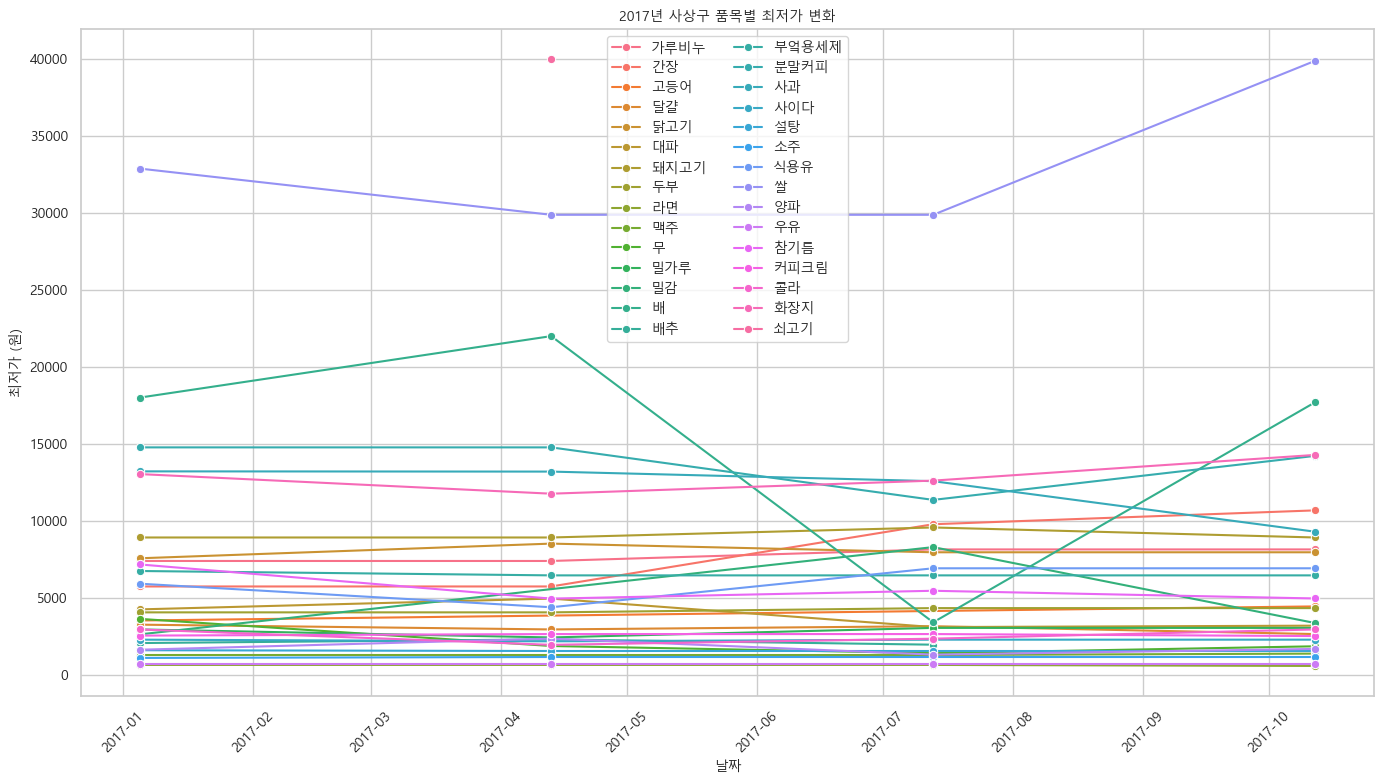

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2017_1q.csv")
q2 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2017_2q.csv")
q3 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2017_3q.csv")
q4 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2017_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2017ÎÖÑ ÏÇ¨ÏÉÅÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÏÇ¨ÏÉÅÍµ¨2017_min.csv", index=False, encoding="utf-8-sig")

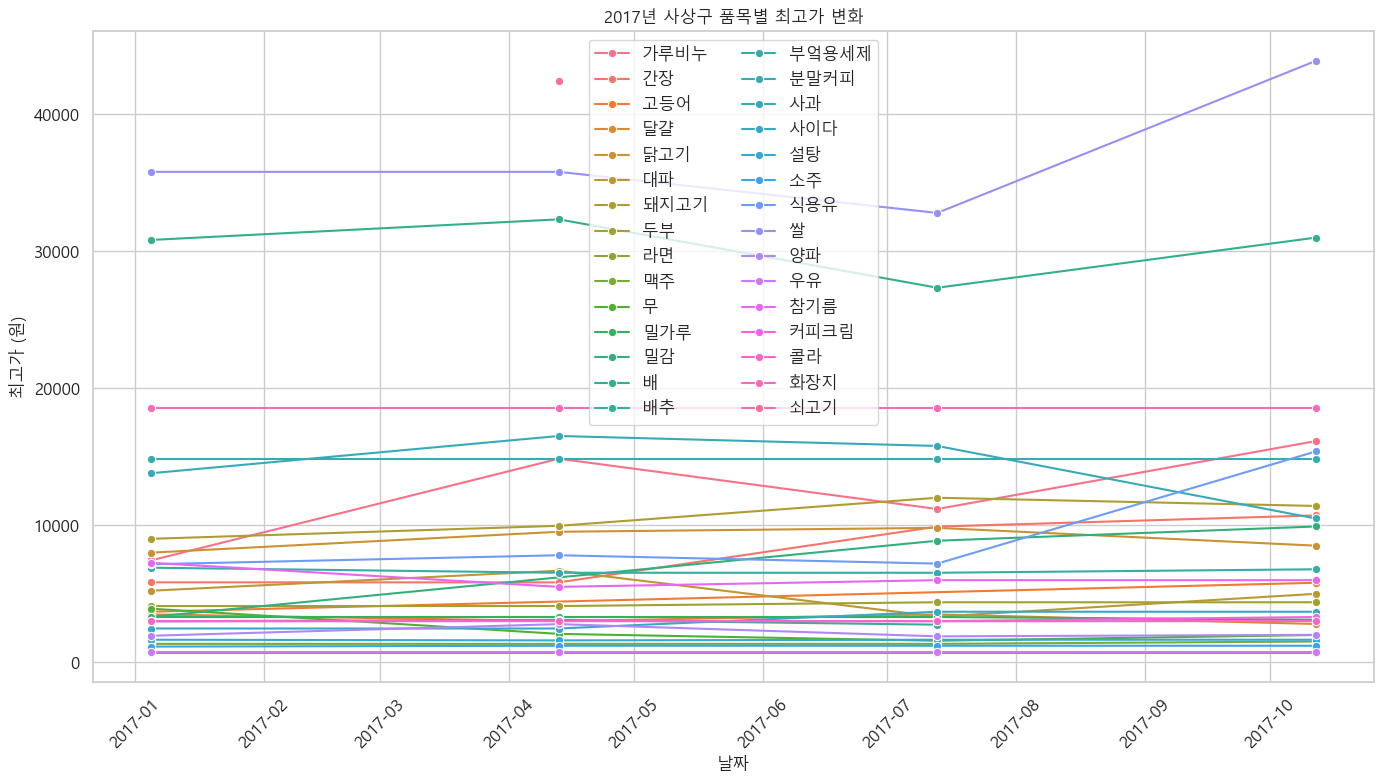

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2017_1q.csv")
q2 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2017_2q.csv")
q3 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2017_3q.csv")
q4 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2017_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2017ÎÖÑ ÏÇ¨ÏÉÅÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÏÇ¨ÏÉÅÍµ¨2017_max.csv", index=False, encoding="utf-8-sig")